In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

Question No.1

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Cutlets.csv to Cutlets.csv


Two-sample t-test to compare the means of the two independent samples

In [ ]:
cutlets=pd.read_csv("Cutlets.csv")

In [ ]:
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [ ]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [ ]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


In [ ]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [ ]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


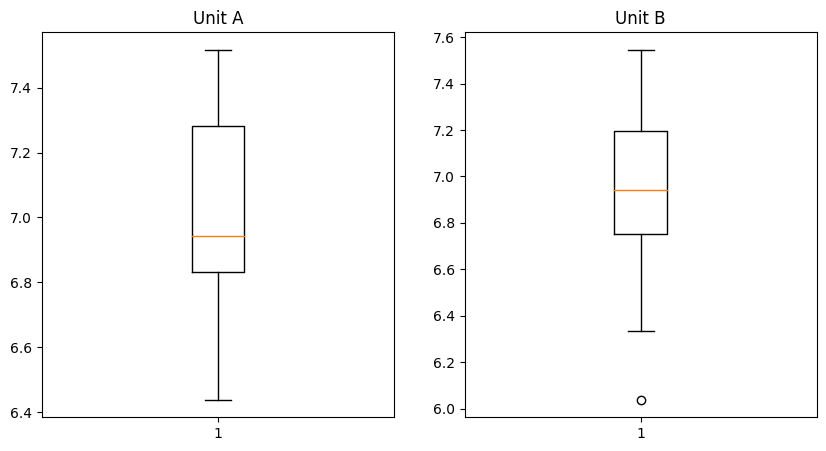

In [ ]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

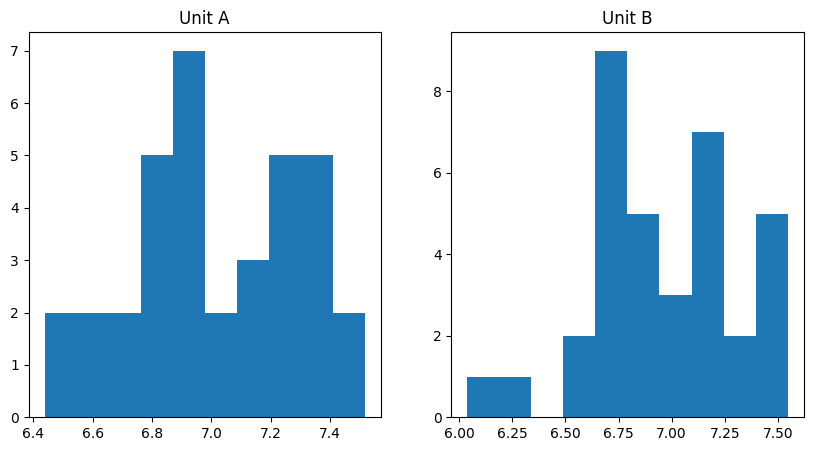

In [ ]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins = 10)
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutlets['Unit B'], bins = 10)
plt.title('Unit B')
plt.show()

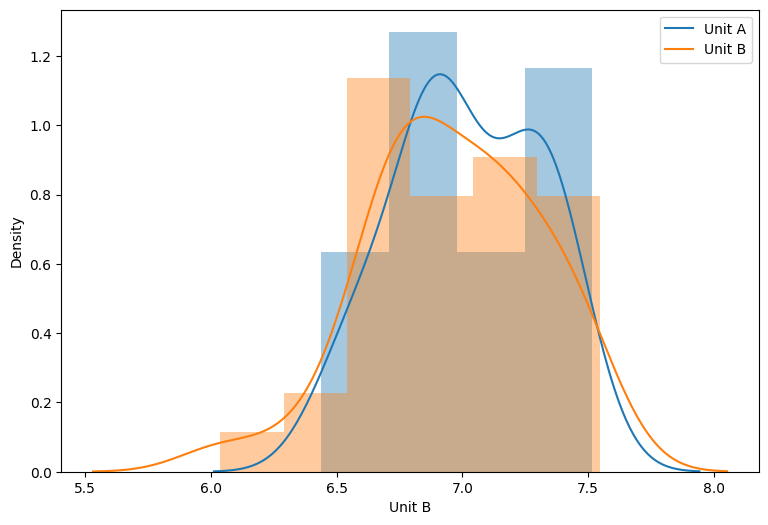

In [ ]:
plt.figure(figsize = (9,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'],hist = True)
plt.legend(labels)

Plotting Q-Q plot to check whether the distribution follows normal distribution or not

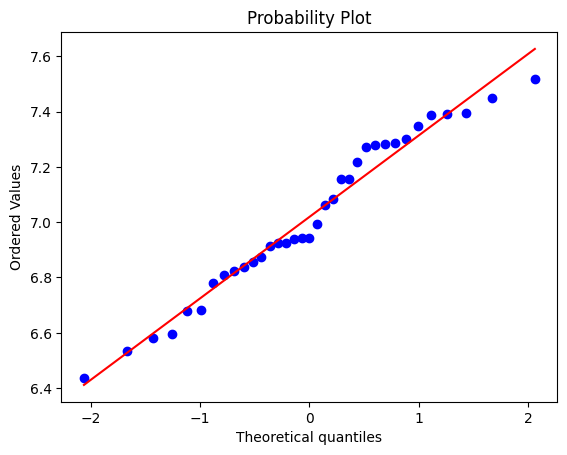

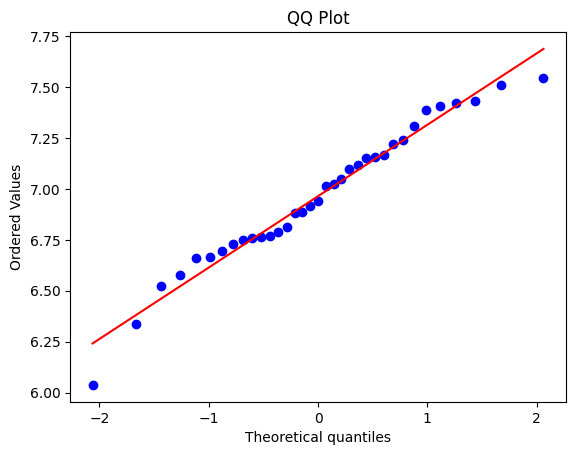

In [ ]:
# Create a QQ plot using probplot
fig, ax = plt.subplots()
stats.probplot(cutlets['Unit A'], plot=ax)
fig, ax = plt.subplots()

stats.probplot(cutlets['Unit B'], plot=ax)

# Set plot labels
ax.set_title("QQ Plot")

# Show the plot
plt.show()

In [ ]:
unitA=cutlets['Unit A']

In [ ]:
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [ ]:
unitB=cutlets['Unit B']

In [ ]:
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [ ]:
p_value=stats.ttest_ind(unitA,unitB)

In [ ]:
p_value

TtestResult(statistic=0.7228688704678063, pvalue=0.4722394724599501, df=68.0)

In [ ]:
p_value[1]

0.4722394724599501

 Compare p_value with '$\alpha$ '(Significane Level)

 If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence
 If p_value is = '$\alpha$ ' we reject Null Hypothesis

significane=0.025, p=0.472

we fail to reject Null Hypothesis

Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

Question No.2

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving LabTAT.csv to LabTAT.csv


The ANOVA test will help us determine if there are any significant differences in the means of multiple groups.

In [ ]:
labtat=pd.read_csv("LabTAT.csv")

In [ ]:
labtat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [ ]:
labtat.shape

(120, 4)

In [ ]:
labtat.dtypes

Laboratory 1    float64
Laboratory 2    float64
Laboratory 3    float64
Laboratory 4    float64
dtype: object

In [ ]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [ ]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [ ]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

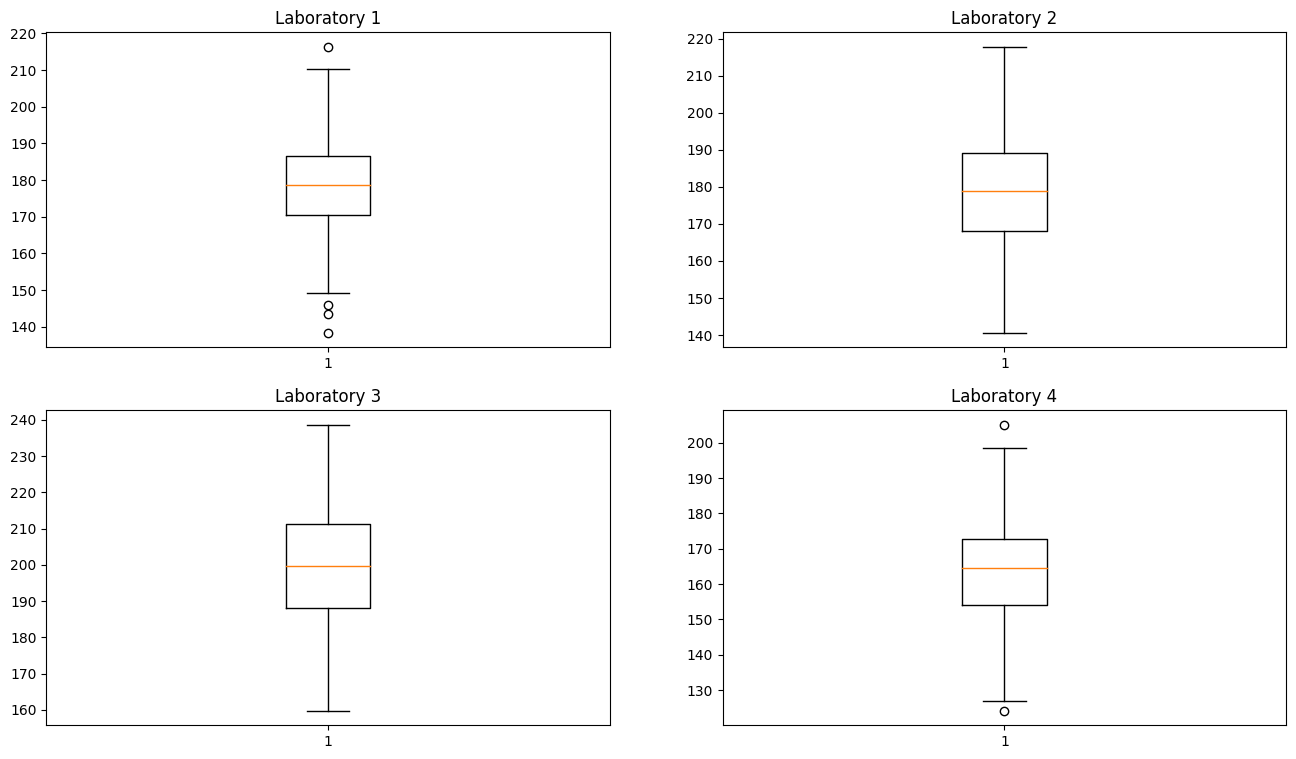

In [ ]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

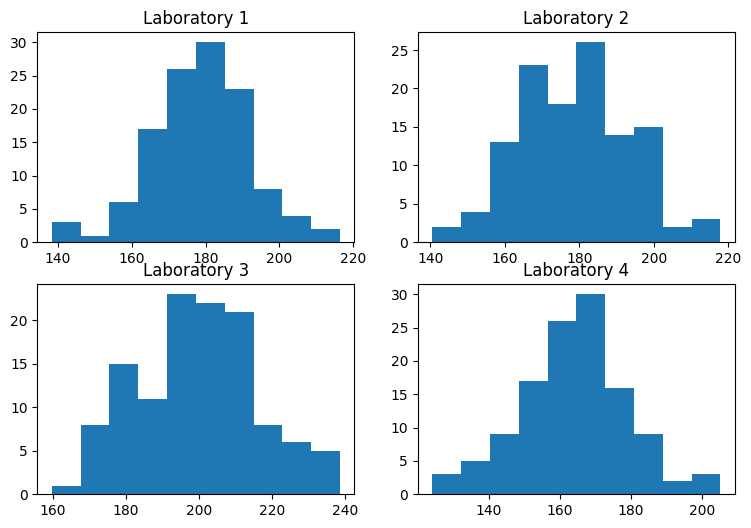

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

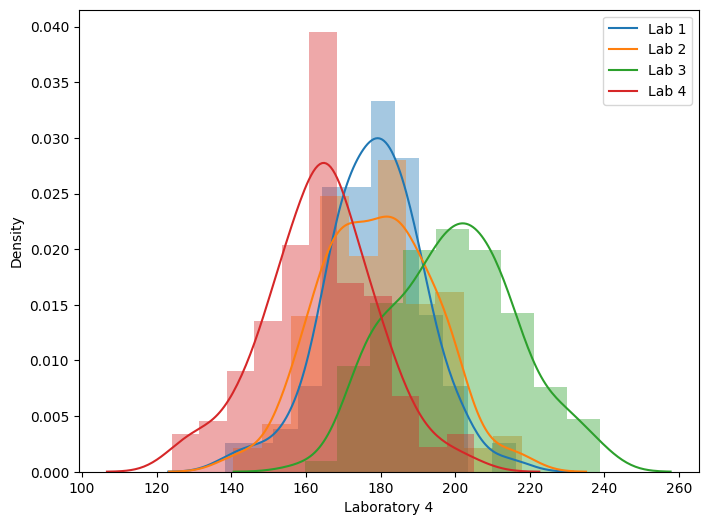

In [ ]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labtat['Laboratory 1'], kde = True)
sns.distplot(labtat['Laboratory 2'],hist = True)
sns.distplot(labtat['Laboratory 3'],hist = True)
sns.distplot(labtat['Laboratory 4'],hist = True)
plt.legend(labels)

Plotting Q-Q plot to check whether the distribution follows normal distribution or not

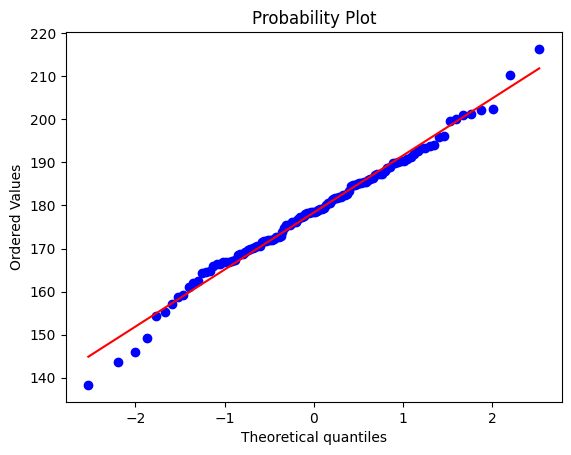

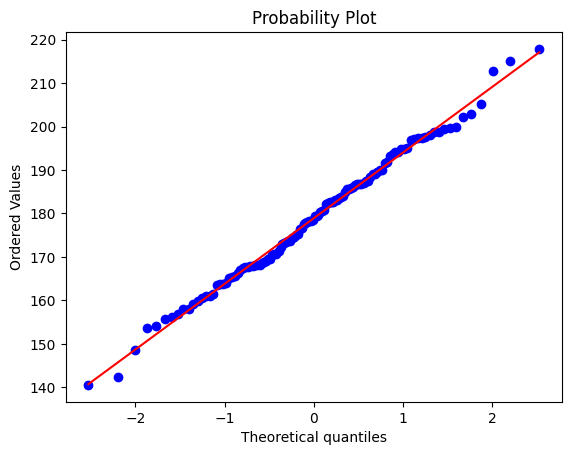

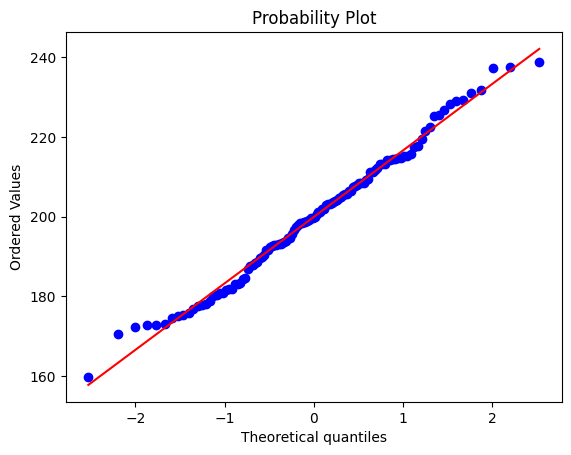

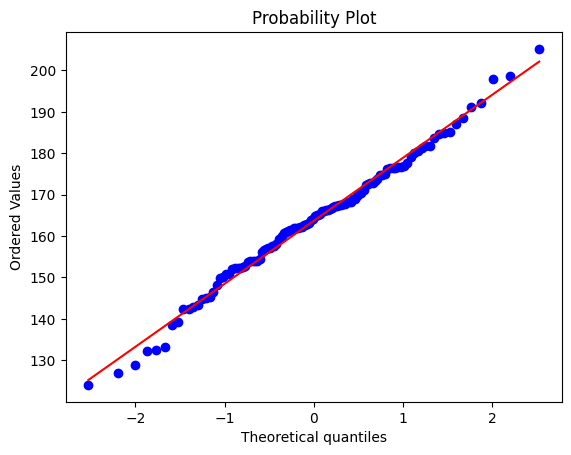

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Laboratory 1')
stats.probplot(labtat['Laboratory 1'], plot=ax)

fig, ax = plt.subplots()
ax.set_title('Laboratory 2')
stats.probplot(labtat['Laboratory 2'], plot=ax)

fig, ax = plt.subplots()
ax.set_title('Laboratory 3')
stats.probplot(labtat['Laboratory 3'], plot=ax)

fig, ax = plt.subplots()
ax.set_title('Laboratory 4')
stats.probplot(labtat['Laboratory 4'], plot=ax)

plt.show()

In [ ]:
p_value=stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories

Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

Question No.3

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving BuyerRatio.csv to BuyerRatio.csv


In [ ]:
data=pd.read_csv("BuyerRatio.csv",index_col=0)

In [ ]:
data

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [ ]:
obs=np.array([[50,142,131,70],[435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [ ]:
chi2_contingency(obs)
# o/p is (Chi2 stats value, p_value, df, expected obsvations)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [ ]:
stat, p, dof, exp = stats.chi2_contingency(data)
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


 As (p-value = 0.6603) > (α = 0.05);

 We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

Question No.4

 TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm.csv


In [ ]:
data=pd.read_csv("Costomer+OrderForm.csv")

In [ ]:
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [ ]:
data.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [ ]:
data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [ ]:
data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [ ]:
data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [ ]:
array=np.array([[271,267,269,280],[29,33,31,20]])

In [ ]:
array

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [ ]:
chi2_contingency(array)
# o/p is (Chi2 stats value, p_value, df, expected obsvations)

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

In [ ]:
# Calculating Expected Values for Observed data
stat, p, df, exp = stats.chi2_contingency(array)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


As (p_value = 0.2771) > (α = 0.05);

We fail to reject Null Hypothesis because of lack of evidence.
